# **Random Forest**

In [1]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [2]:
# 2. Cargar dataset
!git clone https://github.com/datasciencedojo/datasets.git

# Cargar CSV
data = pd.read_csv("datasets/titanic.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

Cloning into 'datasets'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 79 (delta 2), reused 2 (delta 2), pack-reused 75 (from 1)
Receiving objects: 100% (79/79), 17.97 MiB | 9.20 MiB/s, done.
Resolving deltas: 100% (35/35), done.
Dimensiones del dataset: (891, 12)
Columnas disponibles: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/tmp/ipython-input-2255152696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=data, palette="viridis")


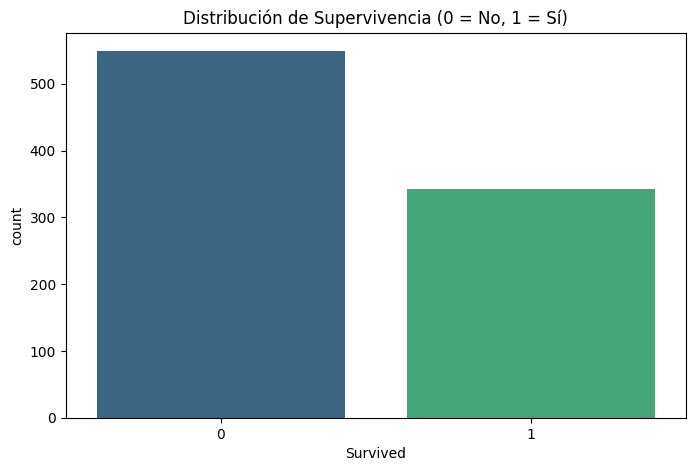

In [3]:
# ================================
# 3. Visualización inicial del dataset
# ================================
plt.figure(figsize=(8,5))
sns.countplot(x="Survived", data=data, palette="viridis")
plt.title("Distribución de Supervivencia (0 = No, 1 = Sí)")
plt.show()

In [4]:
# ================================
# 4. Preprocesamiento
# ================================
# Eliminamos columnas irrelevantes
df = data.drop(columns=["Name", "Ticket", "Cabin"])

# Imputar valores faltantes
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

/tmp/ipython-input-3396591492.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-3396591492.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [5]:
# ================================
# 5. Definir variables predictoras y objetivo
# ================================
X = df.drop(columns=["Survived"])
y = df["Survived"]

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# ================================
# 6. Entrenar modelo (Random Forest)
# ================================
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [7]:
# ================================
# 7. Métricas de evaluación
# ================================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)   # sensibilidad
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de Clasificación:")
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print(f"Precisión: {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de Clasificación:
Exactitud (Accuracy): 0.8268
Precisión: 0.8209
Sensibilidad (Recall): 0.7432
F1 Score: 0.7801


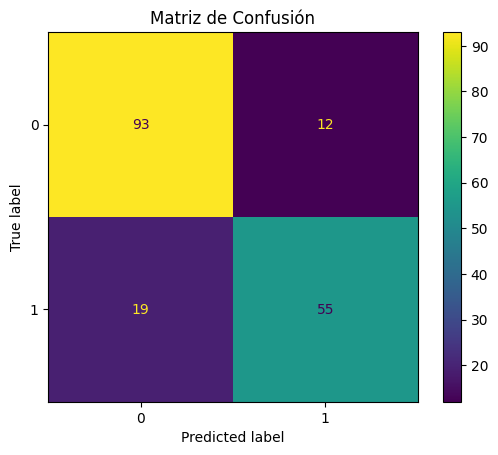

In [8]:
# ================================
# 8. Matriz de confusión
# ================================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="viridis")
plt.title("Matriz de Confusión")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-614266804.py:41: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_viz["Sex"], X_test_viz["Pclass"], c=y_pred_viz,


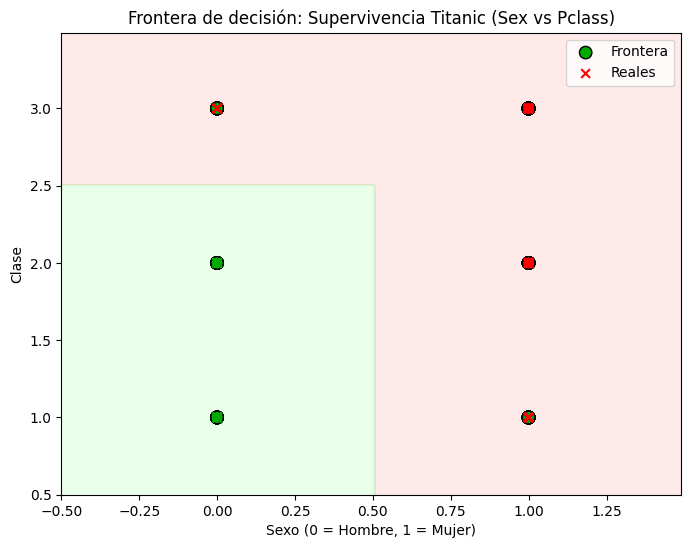

In [9]:
# 10. Frontera de decisión con datos reales y predichos
# Variables seleccionadas
X_viz = df[["Sex", "Pclass"]]
y_viz = df["Survived"]

# División en train/test
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz, test_size=0.2, random_state=42
)

# Modelo con estas 2 variables
model_viz = RandomForestClassifier(random_state=42)
model_viz.fit(X_train_viz, y_train_viz)

# Predicciones
y_pred_viz = model_viz.predict(X_test_viz)

# Crear malla para la frontera
x_min, x_max = X_viz["Sex"].min() - 0.5, X_viz["Sex"].max() + 0.5
y_min, y_max = X_viz["Pclass"].min() - 0.5, X_viz["Pclass"].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colores
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB"])
cmap_bold = ListedColormap(["#FF0000", "#00AA00"])

plt.figure(figsize=(8,6))

# Frontera
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Reales
plt.scatter(X_test_viz["Sex"], X_test_viz["Pclass"], c=y_test_viz,
            cmap=cmap_bold, edgecolor="k", s=80, marker="o", label="Reales")

# Predicciones
plt.scatter(X_test_viz["Sex"], X_test_viz["Pclass"], c=y_pred_viz,
            cmap=cmap_bold, edgecolor="k", s=40, marker="x", label="Predicciones")

plt.xlabel("Sexo (0 = Hombre, 1 = Mujer)")
plt.ylabel("Clase")
plt.title("Frontera de decisión: Supervivencia Titanic (Sex vs Pclass)")
plt.legend(["Frontera", "Reales", "Predicciones"])
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1495403576.py:40: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_viz["Pclass"], X_test_viz["Fare"], c=y_pred_viz,


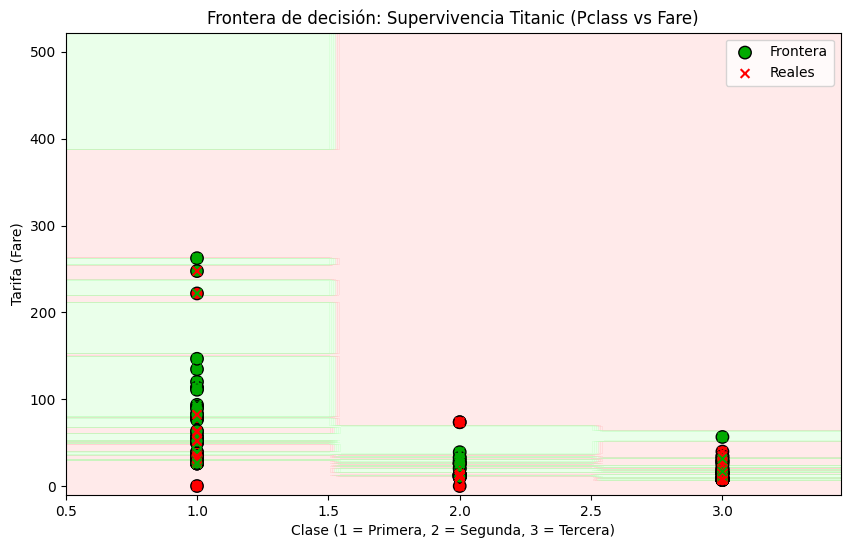

In [10]:
# Variables seleccionadas
X_viz = df[["Pclass", "Fare"]]
y_viz = df["Survived"]

# División en train/test
X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz, test_size=0.2, random_state=42
)

# Modelo con estas 2 variables
model_viz = RandomForestClassifier(random_state=42)
model_viz.fit(X_train_viz, y_train_viz)

# Predicciones
y_pred_viz = model_viz.predict(X_test_viz)

# Crear malla para la frontera
x_min, x_max = X_viz["Pclass"].min() - 0.5, X_viz["Pclass"].max() + 0.5
y_min, y_max = X_viz["Fare"].min() - 10, X_viz["Fare"].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 1))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Colores
cmap_light = ListedColormap(["#FFBBBB", "#BBFFBB"])
cmap_bold = ListedColormap(["#FF0000", "#00AA00"])

plt.figure(figsize=(10,6))

# Frontera
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)

# Reales
plt.scatter(X_test_viz["Pclass"], X_test_viz["Fare"], c=y_test_viz,
            cmap=cmap_bold, edgecolor="k", s=80, marker="o", label="Reales")

# Predicciones
plt.scatter(X_test_viz["Pclass"], X_test_viz["Fare"], c=y_pred_viz,
            cmap=cmap_bold, edgecolor="k", s=40, marker="x", label="Predicciones")

plt.xlabel("Clase (1 = Primera, 2 = Segunda, 3 = Tercera)")
plt.ylabel("Tarifa (Fare)")
plt.title("Frontera de decisión: Supervivencia Titanic (Pclass vs Fare)")
plt.legend(["Frontera", "Reales", "Predicciones"])
plt.show()

# **AdaBoost Classifier**

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [12]:
# Train-Test Split ya lo tenemos, repetimos por claridad
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# Modelo AdaBoost
model = AdaBoostClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [14]:
# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de AdaBoostClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de AdaBoostClassifier
Exactitud (Accuracy): 0.7989
Precisión: 0.7794
Sensibilidad (Recall): 0.7162
F1 Score: 0.7465


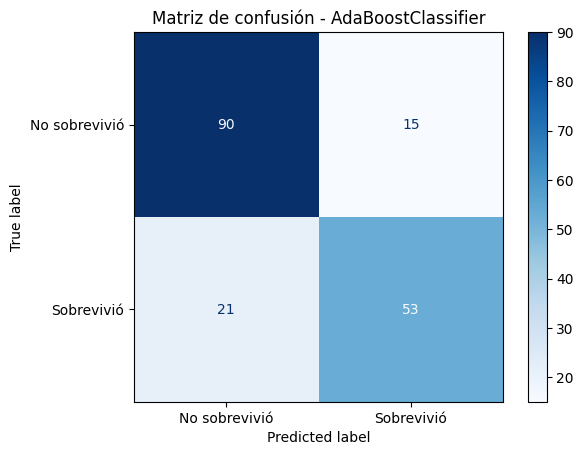

In [15]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - AdaBoostClassifier")
plt.show()

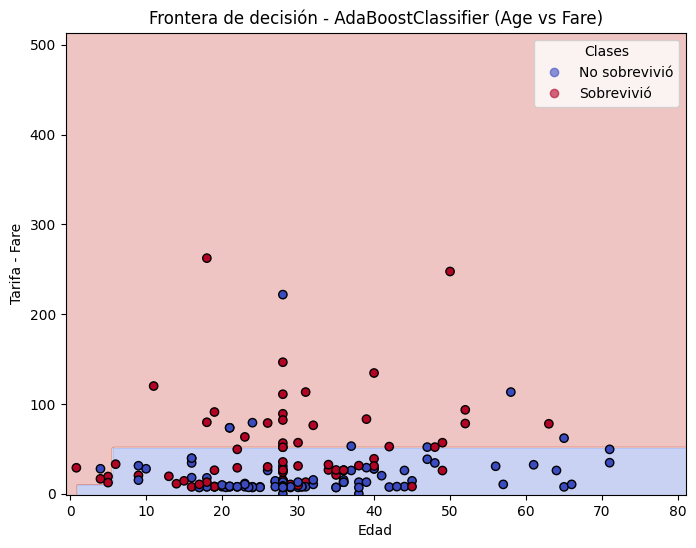

In [16]:
# Frontera de decisión (Age vs Fare)
X_viz = df[["Age", "Fare"]].values
y_viz = y

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz, test_size=0.2, random_state=42
)

model_viz = AdaBoostClassifier(n_estimators=100, random_state=42)
model_viz.fit(X_train_viz, y_train_viz)

x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test_viz,
                      edgecolor="k", cmap=plt.cm.coolwarm)
plt.xlabel("Edad")
plt.ylabel("Tarifa - Fare")
plt.title("Frontera de decisión - AdaBoostClassifier (Age vs Fare)")

handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")
plt.show()

# **GradientBoostingClassifier**

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [18]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
# Modelo GradientBoosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
# Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de GradientBoostingClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de GradientBoostingClassifier
Exactitud (Accuracy): 0.8212
Precisión: 0.8182
Sensibilidad (Recall): 0.7297
F1 Score: 0.7714


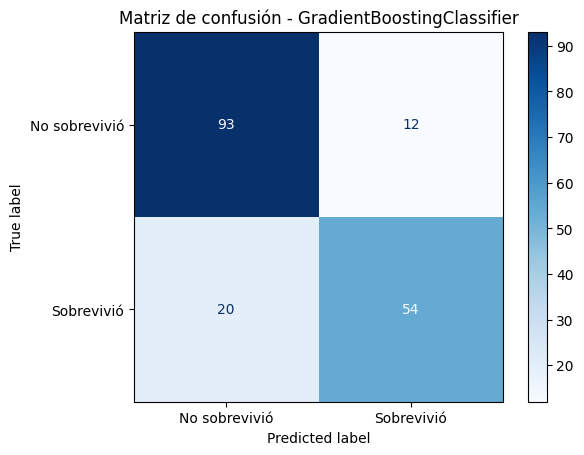

In [21]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - GradientBoostingClassifier")
plt.show()

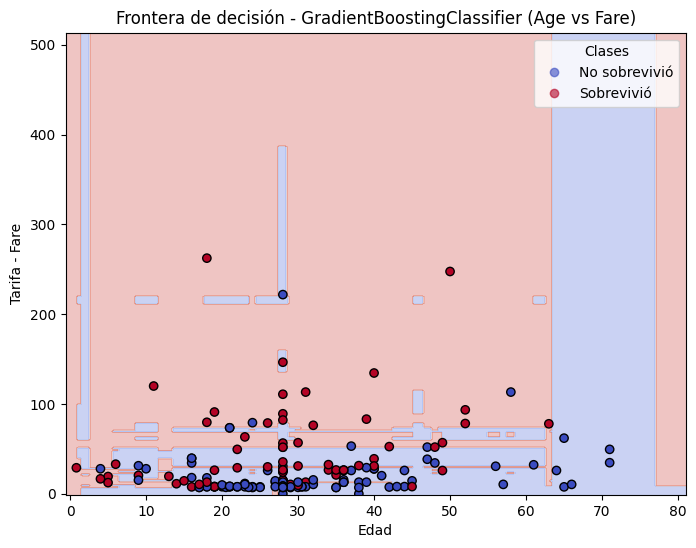

In [22]:
# Frontera de decisión (Age vs Fare)
X_viz = df[["Age", "Fare"]].values
y_viz = y

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz, test_size=0.2, random_state=42
)

model_viz = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model_viz.fit(X_train_viz, y_train_viz)

x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test_viz,
                      edgecolor="k", cmap=plt.cm.coolwarm)
plt.xlabel("Edad")
plt.ylabel("Tarifa - Fare")
plt.title("Frontera de decisión - GradientBoostingClassifier (Age vs Fare)")

handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")
plt.show()

# **SVC**

In [23]:
# 1) Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

In [24]:
# Asegurar que 'Survived' existe
assert 'Survived' in df.columns, "No encuentro la columna objetivo 'Survived' en el CSV."

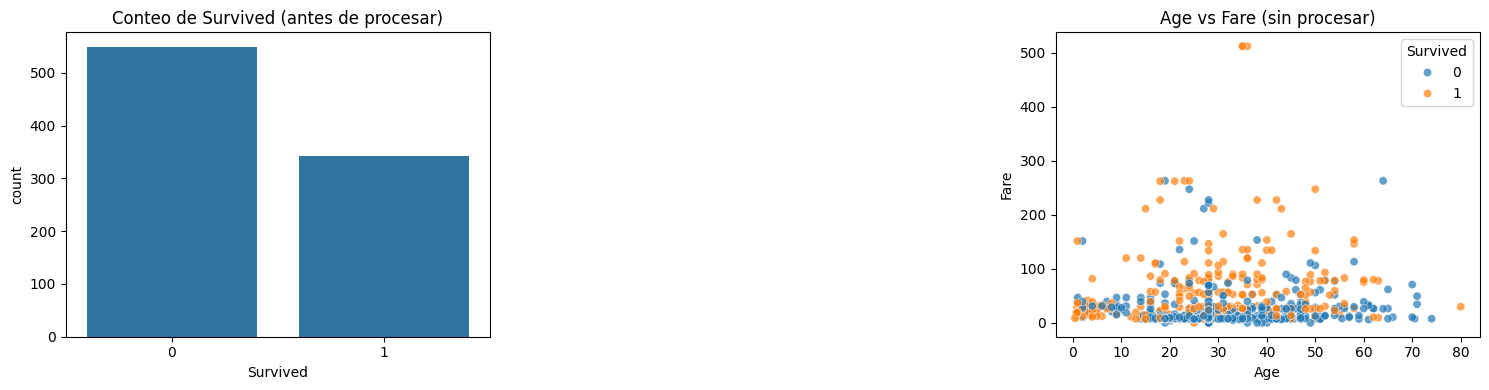

In [25]:
# 3) "Gráfica del dataset antes de hacer algo"
#    Haremos un vistazo rápido: distribución de Survived, histogramas de numéricas, y un scatter Age vs Fare.
num_cols_iniciales = [c for c in ['Age'] if c in df.columns]
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(data=df, x='Survived')
plt.title('Conteo de Survived (antes de procesar)')

plt.subplot(1,3,3)
if set(['Age','Fare']).issubset(df.columns):
    sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
    plt.title('Age vs Fare (sin procesar)')
plt.tight_layout()
plt.show()

In [26]:
# 4) Separar X, y
y = df['Survived'].astype(int)
X = df.drop(columns=['Survived'])

In [27]:
# 5) Definir características por tipo
numeric_features = [c for c in X.select_dtypes(include=[np.number]).columns.tolist()]
categorical_features = [c for c in X.select_dtypes(include=['object','category']).columns.tolist()]

In [28]:
# 6) Preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ],
    remainder='drop'
)

In [29]:
# 7) Modelo SVC en pipeline
svc_clf = Pipeline(steps=[
    ('pre', preprocess),
    ('svc', SVC(kernel='rbf', probability=False, random_state=42))
])

In [30]:
# 8) Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [31]:
# 9) Entrenar
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['PassengerId', 'Pclass',
                                                   'Sex', 'Age', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'Embarked']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('svc', SVC(random_state=42))])

In [32]:
# 10) Predicciones
y_pred = svc_clf.predict(X_test)

In [33]:
# 11) Métricas solicitadas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)  # Sensibilidad
f1 = f1_score(y_test, y_pred, zero_division=0)

print("📊 Métricas de Clasificación (SVC)")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión:            {prec:.4f}")
print(f"Sensibilidad (Recall):{rec:.4f}")
print(f"F1 Score:             {f1:.4f}")

📊 Métricas de Clasificación (SVC)
Exactitud (Accuracy): 0.7989
Precisión:            0.7797
Sensibilidad (Recall):0.6667
F1 Score:             0.7188


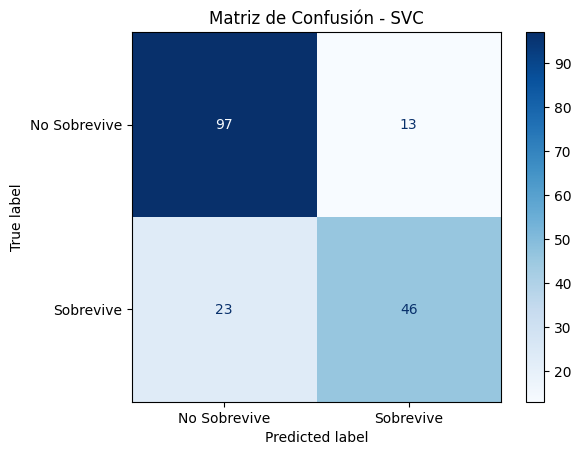

In [34]:
# 12) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['No Sobrevive','Sobrevive'])
disp.plot(values_format='d', cmap='Blues')
plt.title('Matriz de Confusión - SVC')
plt.show()

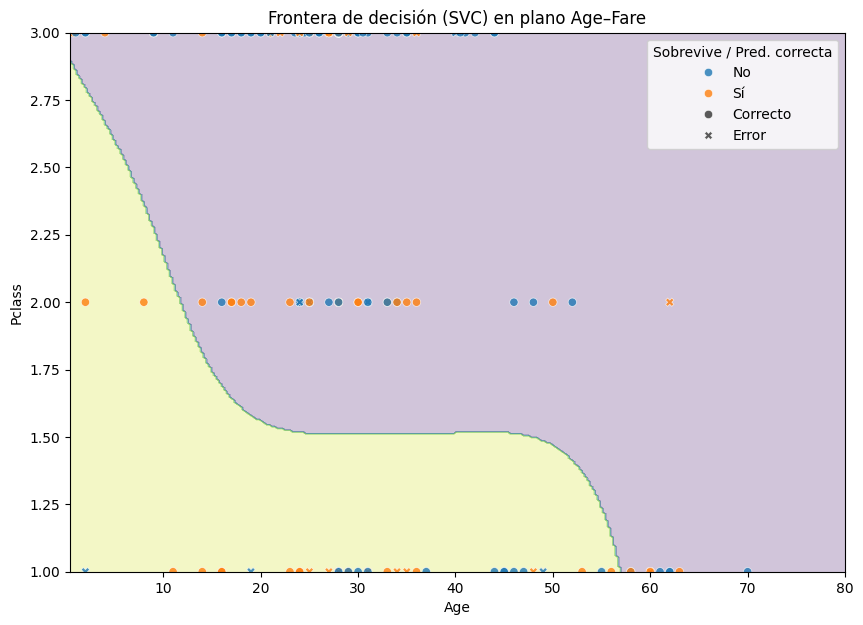

In [35]:
# 13) Gráfica de Frontera de Decisión (2D)
#     Para visualizar, entrenamos un SVC SOLO con dos variables numéricas: Age y Fare.
#     (Se imputan y escalan igual; esto NO reemplaza el modelo completo, es solo para la visualización.)
feat_x, feat_y = 'Age', 'Pclass'
if set([feat_x, feat_y]).issubset(X.columns):
    two_num = [feat_x, feat_y]

    pre_2d = ColumnTransformer(
        transformers=[
            ('num2d', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())
            ]), two_num)
        ],
        remainder='drop'
    )

    svc_2d = Pipeline(steps=[
        ('pre', pre_2d),
        ('svc', SVC(kernel='rbf', C=1.0, gamma='scale', probability=False, random_state=42))
    ])

    # Filtramos filas que tengan al menos uno de los dos features no nulos
    mask_valid = X[feat_x].notna() & X[feat_y].notna()
    X_train2 = X_train.loc[mask_valid.reindex(X_train.index, fill_value=True)]
    y_train2 = y_train.loc[X_train2.index]

    # Ojo: Para consistencia, usemos los mismos índices válidos sobre train
    if X_train2.shape[0] > 10:
        svc_2d.fit(X_train2[[feat_x, feat_y]], y_train2)

        # Crear malla
        x_min, x_max = X[feat_x].min(), X[feat_x].max()
        y_min, y_max = X[feat_y].min(), X[feat_y].max()
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, 300),
            np.linspace(y_min, y_max, 300)
        )
        grid = pd.DataFrame({feat_x: xx.ravel(), feat_y: yy.ravel()})
        Z = svc_2d.predict(grid).reshape(xx.shape)

        # Plot
        plt.figure(figsize=(10,7))
        plt.contourf(xx, yy, Z, alpha=0.25)  # regiones de decisión
        # Puntos verdaderos (del test) coloreados por etiqueta real vs predicha
        if set([feat_x, feat_y]).issubset(X_test.columns):
            sns.scatterplot(
                x=X_test[feat_x], y=X_test[feat_y],
                hue=y_test.map({0:'No',1:'Sí'}),
                style=(y_pred==y_test).map({True:'Correcto', False:'Error'}),
                alpha=0.8
            )
            plt.legend(title='Sobrevive / Pred. correcta')
        else:
            sns.scatterplot(
                x=X[feat_x], y=X[feat_y],
                hue=y.map({0:'No',1:'Sí'}),
                alpha=0.6
            )
            plt.legend(title='Sobrevive (real)')

        plt.xlabel(feat_x)
        plt.ylabel(feat_y)
        plt.title('Frontera de decisión (SVC) en plano Age–Fare')
        plt.show()

# **LinearSVC**

In [36]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

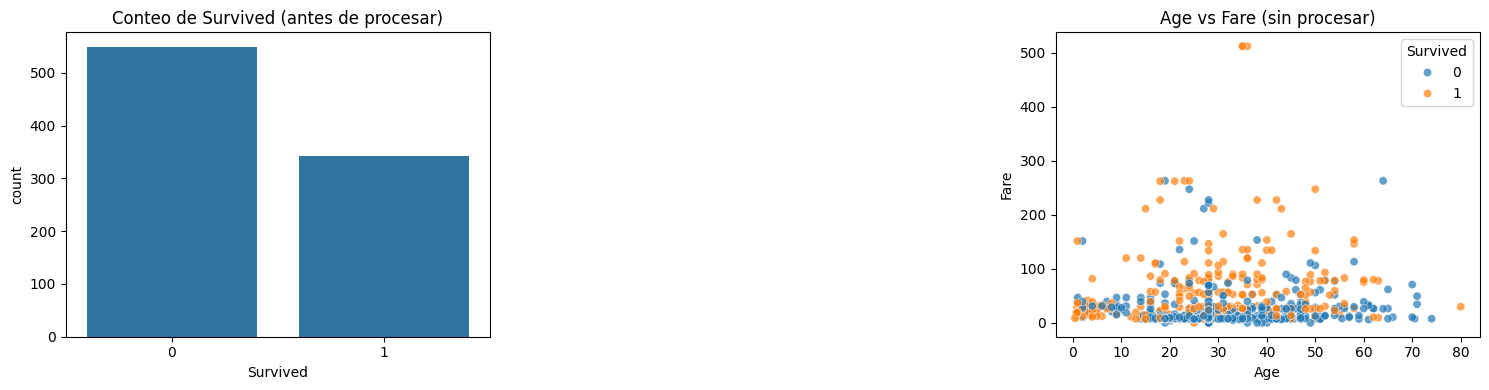

In [37]:
# 3. Gráfica del dataset antes de hacer algo
#    Haremos un vistazo rápido: distribución de Survived, histogramas de numéricas, y un scatter Age vs Fare.
num_cols_iniciales = [c for c in ['Age'] if c in df.columns]
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(data=df, x='Survived')
plt.title('Conteo de Survived (antes de procesar)')

plt.subplot(1,3,3)
if set(['Age','Fare']).issubset(df.columns):
    sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
    plt.title('Age vs Fare (sin procesar)')
plt.tight_layout()
plt.show()

In [38]:
# 4. Preprocesamiento

# Eliminar columnas poco útiles
df = df.drop(["PassengerId"], axis=1)

# Llenar valores nulos
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

# Variables predictoras y objetivo
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Estandarizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-2275535954.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2275535954.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [39]:
# 5. Modelo LinearSVC
model = LinearSVC(max_iter=10000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de LinearSVC")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de LinearSVC
Exactitud (Accuracy): 0.7877
Precisión: 0.7571
Sensibilidad (Recall): 0.7162
F1 Score: 0.7361


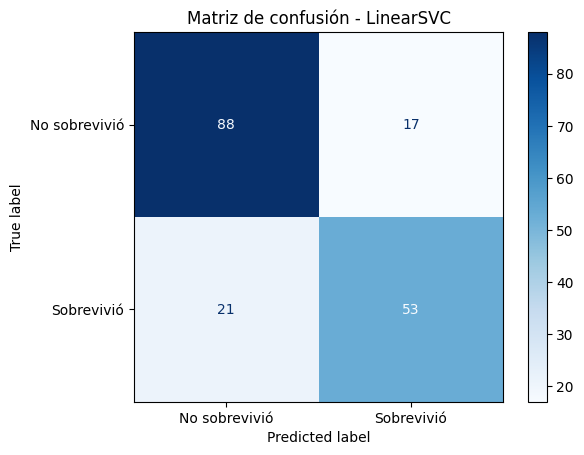

In [41]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - LinearSVC")
plt.show()

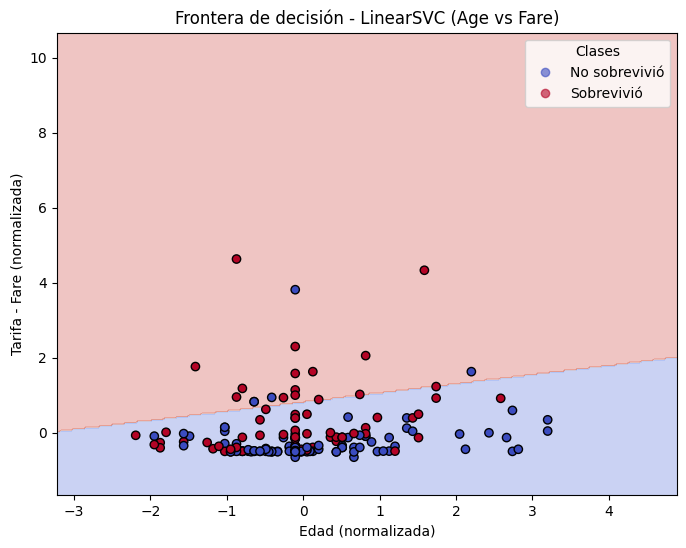

In [42]:
# 8. Gráfica frontera de decisión (2 variables)
# Usamos solo dos variables para visualizar: Age y Fare
X_viz = df[["Age", "Fare"]]
X_viz = scaler.fit_transform(X_viz)

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y, test_size=0.2, random_state=42
)

model_viz = LinearSVC(max_iter=10000, random_state=42)
model_viz.fit(X_train_viz, y_train_viz)

# Crear malla
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(
    X_test_viz[:, 0], X_test_viz[:, 1],
    c=y_test_viz, edgecolor="k", cmap=plt.cm.coolwarm
)

plt.xlabel("Edad (normalizada)")
plt.ylabel("Tarifa - Fare (normalizada)")
plt.title("Frontera de decisión - LinearSVC (Age vs Fare)")

# Leyenda (overlay)
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")

plt.show()

# **NuSVC**

In [43]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import NuSVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

In [44]:
# 4. Preprocesamiento
# Llenar valores nulos
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

# Variables predictoras y objetivo
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Estandarizar (muy importante para SVM/NuSVC)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-298404964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-298404964.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [45]:
# 5. Modelo NuSVC
model = NuSVC(nu=0.5, kernel="rbf", random_state=42)  # puedes ajustar nu (0 < nu <= 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de NuSVC")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de NuSVC
Exactitud (Accuracy): 0.8156
Precisión: 0.8060
Sensibilidad (Recall): 0.7297
F1 Score: 0.7660


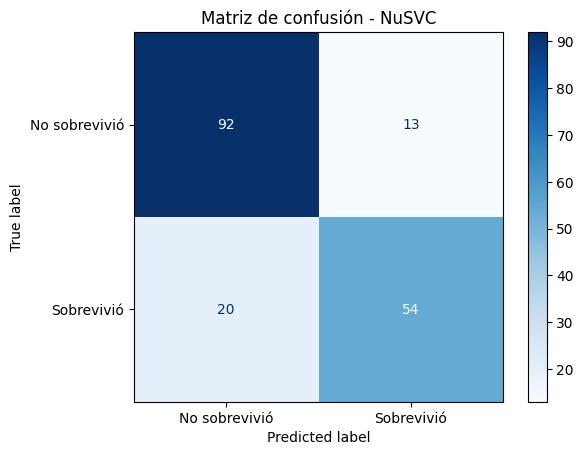

In [47]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - NuSVC")
plt.show()

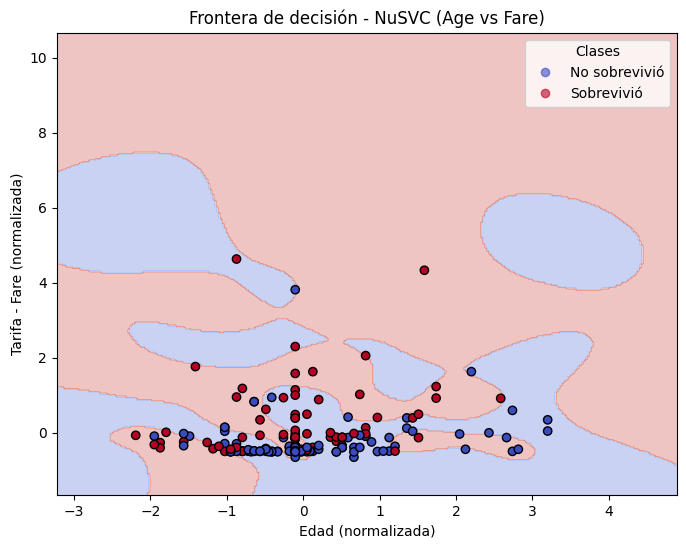

In [48]:
# 8. Gráfica frontera de decisión
# Usamos solo dos variables para visualizar: Age y Fare
X_viz = df[["Age", "Fare"]].values
X_viz = scaler.fit_transform(X_viz)
y_viz = y

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz, test_size=0.2, random_state=42
)

model_viz = NuSVC(nu=0.5, kernel="rbf", random_state=42)
model_viz.fit(X_train_viz, y_train_viz)

# Crear malla
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico con overlay
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(
    X_test_viz[:, 0], X_test_viz[:, 1],
    c=y_test_viz, edgecolor="k", cmap=plt.cm.coolwarm
)

plt.xlabel("Edad (normalizada)")
plt.ylabel("Tarifa - Fare (normalizada)")
plt.title("Frontera de decisión - NuSVC (Age vs Fare)")

# Leyenda (overlay)
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")

plt.show()

# **KNN Classifier**

In [49]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

In [50]:
!git clone https://github.com/datasciencedojo/datasets.git

# Cargar CSV
data = pd.read_csv("datasets/titanic.csv")

print("Dimensiones del dataset:", data.shape)
print("Columnas disponibles:", data.columns)
data.head()

fatal: destination path 'datasets' already exists and is not an empty directory.
Dimensiones del dataset: (891, 12)
Columnas disponibles: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


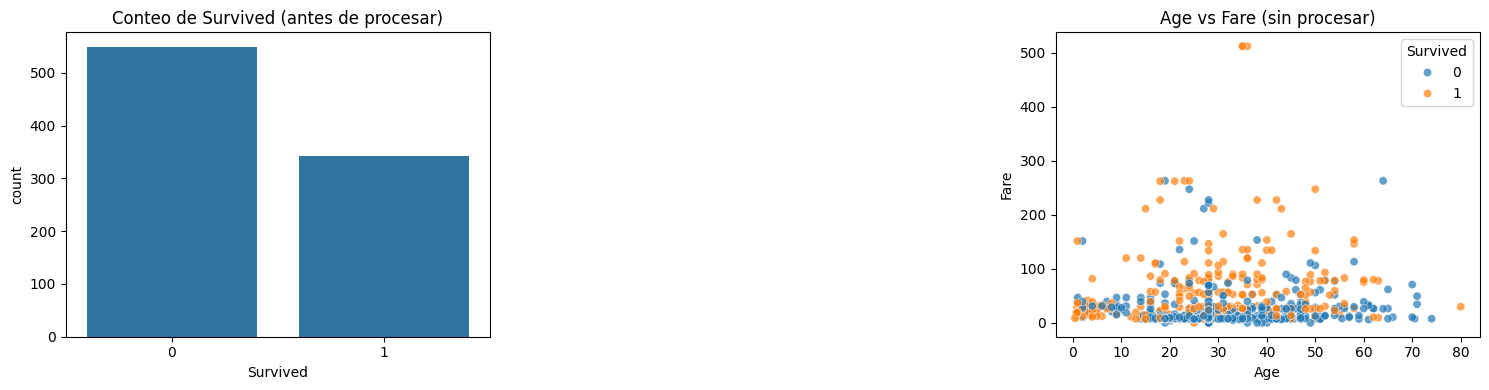

In [51]:
# 3. Gráfica del dataset antes de hacer algo
#    Haremos un vistazo rápido: distribución de Survived, histogramas de numéricas, y un scatter Age vs Fare.
num_cols_iniciales = [c for c in ['Age'] if c in df.columns]
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(data=df, x='Survived')
plt.title('Conteo de Survived (antes de procesar)')

plt.subplot(1,3,3)
if set(['Age','Fare']).issubset(df.columns):
    sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.7)
    plt.title('Age vs Fare (sin procesar)')
plt.tight_layout()
plt.show()

In [52]:
# 4. Preprocesamiento

# Llenar valores nulos
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

# Variables predictoras y objetivo
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Estandarizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-62921627.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-62921627.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [53]:
# 5. Modelo KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de KNeighborsClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de KNeighborsClassifier
Exactitud (Accuracy): 0.7989
Precisión: 0.7714
Sensibilidad (Recall): 0.7297
F1 Score: 0.7500


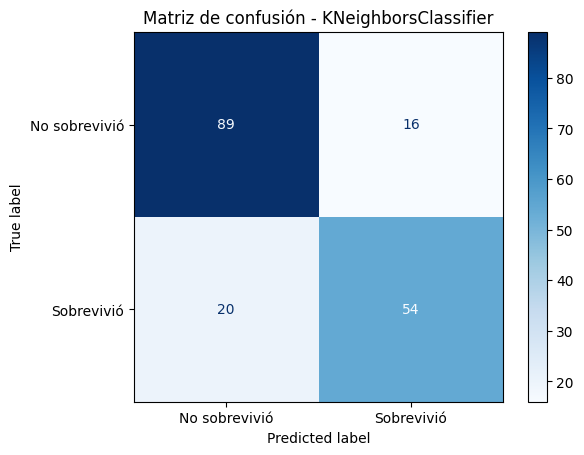

In [55]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - KNeighborsClassifier")
plt.show()

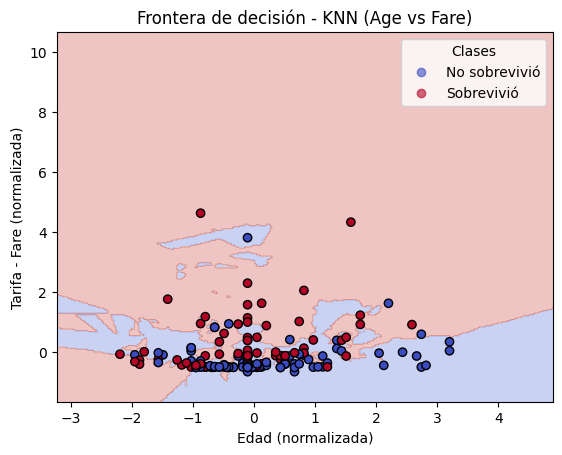

In [56]:
# 8. Gráfica frontera de decisión (2 variables)
# Usamos solo dos variables para visualizar: Age y Fare
X_viz = df[["Age", "Fare"]]
X_viz = scaler.fit_transform(X_viz)

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y, test_size=0.2, random_state=42
)

model_viz = KNeighborsClassifier(n_neighbors=5)
model_viz.fit(X_train_viz, y_train_viz)

# Crear malla
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test_viz, edgecolor="k", cmap=plt.cm.coolwarm)
plt.xlabel("Edad (normalizada)")
plt.ylabel("Tarifa - Fare (normalizada)")
plt.title("Frontera de decisión - KNN (Age vs Fare)")

handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")
plt.show()

# **GaussianNB**

In [57]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

In [58]:
# 4. Preprocesamiento
# Llenar valores nulos
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

# Variables predictoras y objetivo
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-3820671882.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-3820671882.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [59]:
# 5. Modelo GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [60]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de GaussianNB")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de GaussianNB
Exactitud (Accuracy): 0.7765
Precisión: 0.7125
Sensibilidad (Recall): 0.7703
F1 Score: 0.7403


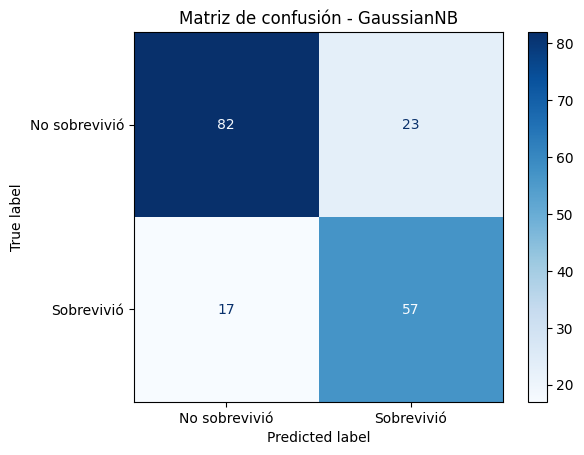

In [61]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - GaussianNB")
plt.show()

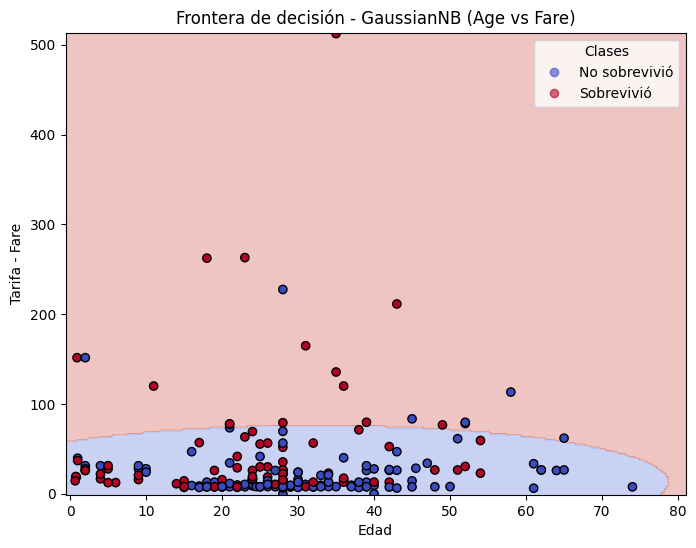

In [62]:
# 8. Gráfica frontera de decisión (2 variables)
# Usamos solo dos variables para visualizar: Age y Fare
X_viz = df[["Age", "Fare"]].values
y_viz = y

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz)

model_viz = GaussianNB()
model_viz.fit(X_train_viz, y_train_viz)

# Crear malla
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico con overlay
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(
    X_test_viz[:, 0], X_test_viz[:, 1],
    c=y_test_viz, edgecolor="k", cmap=plt.cm.coolwarm, label=y_test_viz
)

# Etiquetas e interpretación
plt.xlabel("Edad")
plt.ylabel("Tarifa - Fare")
plt.title("Frontera de decisión - GaussianNB (Age vs Fare)")

# Agregar leyenda (overlay)
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")

plt.show()

# **DecisionTreeClassifier**

In [63]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
)

In [64]:
# 4. Preprocesamiento

# Llenar valores nulos
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

# Variables predictoras y objetivo
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-2163366709.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-2163366709.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [65]:
# 5. Modelo DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [66]:
# 6. Métricas
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de DecisionTreeClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de DecisionTreeClassifier
Exactitud (Accuracy): 0.7989
Precisión: 0.8276
Sensibilidad (Recall): 0.6486
F1 Score: 0.7273


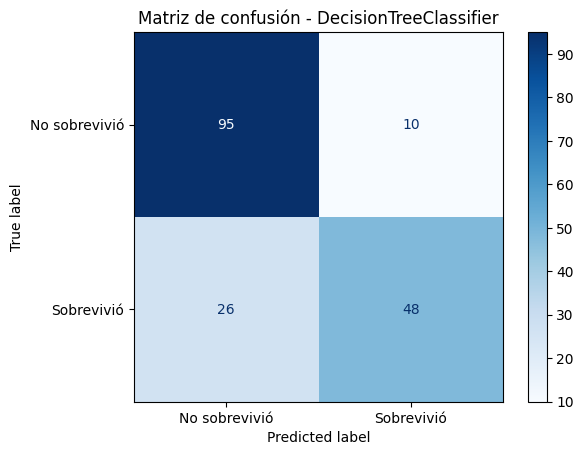

In [67]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - DecisionTreeClassifier")
plt.show()

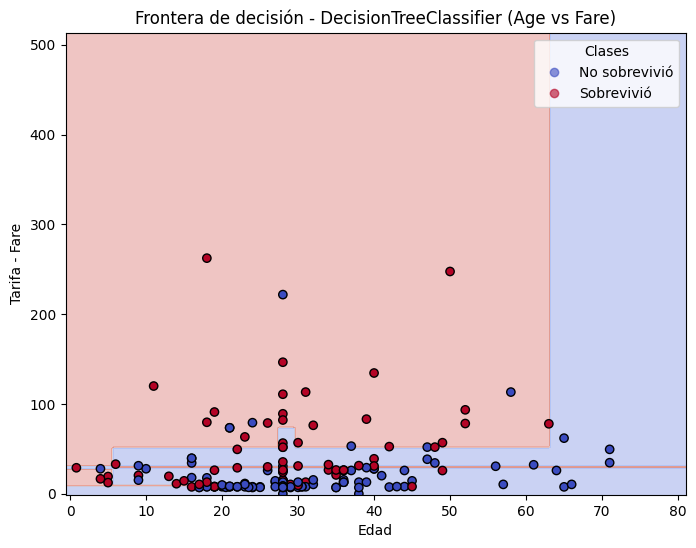

In [68]:
# 8. Gráfica frontera de decisión

# Usamos solo dos variables para visualizar: Age y Fare
X_viz = df[["Age", "Fare"]].values
y_viz = y

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz, test_size=0.2, random_state=42
)

model_viz = DecisionTreeClassifier(random_state=42, max_depth=5)
model_viz.fit(X_train_viz, y_train_viz)

# Crear malla
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Gráfico con overlay
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(
    X_test_viz[:, 0], X_test_viz[:, 1],
    c=y_test_viz, edgecolor="k", cmap=plt.cm.coolwarm
)

plt.xlabel("Edad")
plt.ylabel("Tarifa - Fare")
plt.title("Frontera de decisión - DecisionTreeClassifier (Age vs Fare)")

# Leyenda (overlay)
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")

plt.show()

# **MLPClassifier**

In [69]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [70]:
# Preprocesamiento (igual que antes, pero con normalización)

# Llenar valores nulos
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Codificar variables categóricas
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

# Variables predictoras y objetivo
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

/tmp/ipython-input-658897289.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-658897289.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [71]:
# 5. Modelo MLPClassifier
# ============================================
model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [72]:
# 6. Métricas
# ============================================
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("📊 Métricas de MLPClassifier")
print(f"Exactitud (Accuracy): {acc:.4f}")
print(f"Precisión: {prec:.4f}")
print(f"Sensibilidad (Recall): {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

📊 Métricas de MLPClassifier
Exactitud (Accuracy): 0.7989
Precisión: 0.7639
Sensibilidad (Recall): 0.7432
F1 Score: 0.7534


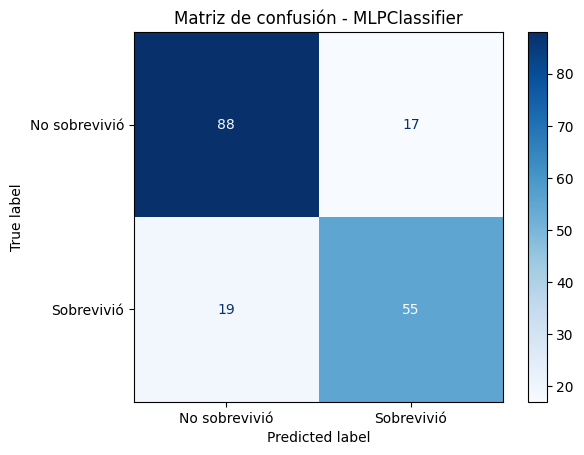

In [73]:
# 7. Matriz de confusión
# ============================================
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No sobrevivió", "Sobrevivió"])
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - MLPClassifier")
plt.show()

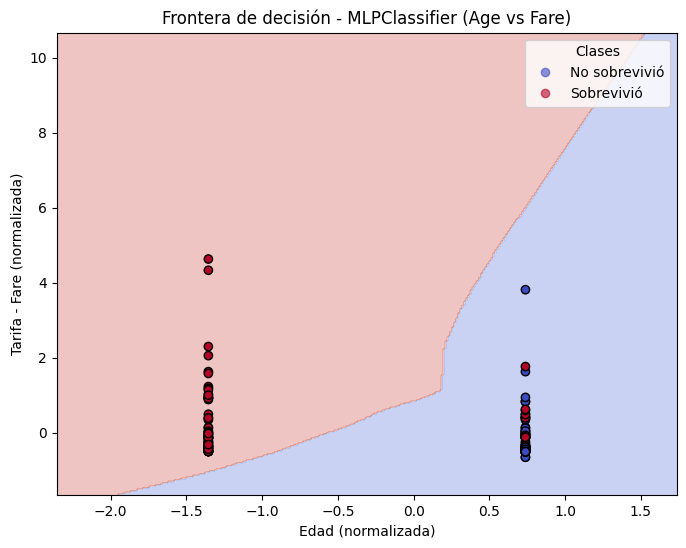

In [74]:
# 8. Gráfica frontera de decisión (2 variables)
# ============================================
# Usamos Age y Fare para visualizar
X_viz = df[["Sex", "Fare"]].values
X_viz = scaler.fit_transform(X_viz)
y_viz = y

X_train_viz, X_test_viz, y_train_viz, y_test_viz = train_test_split(
    X_viz, y_viz, test_size=0.2, random_state=42
)

model_viz = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
model_viz.fit(X_train_viz, y_train_viz)

# Crear malla
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = model_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c=y_test_viz,
                      edgecolor="k", cmap=plt.cm.coolwarm)
plt.xlabel("Edad (normalizada)")
plt.ylabel("Tarifa - Fare (normalizada)")
plt.title("Frontera de decisión - MLPClassifier (Age vs Fare)")

# Leyenda (overlay)
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
labels = ["No sobrevivió", "Sobrevivió"]
plt.legend(handles, labels, title="Clases", loc="upper right")
plt.show()